# General Assembly Capstone: Time Series Forecasting of Texas Electricity Data
----

## <span style="color:Green">01 - Preprocessing - Merging & Cleaning 2015 Data</span>      
----

### Imports

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the data

Source data can be found at http://www.ercot.com/gridinfo/generation

In [4]:
df = pd.read_excel('/Users/andrewroberts/desktop/ga/capstone/Data/FuelMixReport_PreviousYears/IntGenByFuel2015.xls', sheet_name = None)

In [5]:
df.keys()

dict_keys(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan'])

## 2. Clean the data

#### Combine all the sheets into one dataframe

In [6]:
cdf = pd.concat(df,sort=False)

In [8]:
cdf.head()

Date-Fuel          Total     00:15:00     00:30:00     00:45:00  \
Dec 0  12/01/15_Biomass    1379.346921    14.239440    14.288421    14.514236   
    1     12/01/15_Coal  239627.197886  2282.865809  2319.417685  2267.682240   
    2      12/01/15_Gas   50966.716103   400.081767   394.293021   394.393169   
    3   12/01/15_Gas-CC  450916.899571  4065.476972  3944.815169  3881.690189   
    4    12/01/15_Hydro    2539.899925    22.328659    23.254565    23.451511   

          01:00:00     01:15:00     01:30:00     01:45:00     02:00:00  ...  \
Dec 0    14.634674    14.629758    14.625583    14.626262    14.622499  ...   
    1  2236.531719  2209.615375  2159.719585  2117.202034  2116.909071  ...   
    2   395.447782   397.113416   391.416349   395.745964   392.731592  ...   
    3  3894.121365  3900.383533  3875.123233  3891.671631  3885.639184  ...   
    4    25.609302    24.880097    23.788010    23.784302    25.179763  ...   

          00:00:00  DST1  DST2  DST3  DST4  1900-01-01 00:00:00  dst1  dst2  \
Dec 0    14.563067   NaN   NaN   NaN   NaN                  NaN   NaN   NaN   
    1  2162.183893   NaN   NaN   NaN   NaN                  NaN   NaN   NaN   
    2   370.050728   NaN   NaN   NaN   NaN                  NaN   NaN   NaN   
    3  4429.034000   NaN   NaN   NaN   NaN                  NaN   NaN   NaN   
    4    26.814087   NaN   NaN   NaN   NaN                  NaN   NaN   NaN   

       dst3  dst4  
Dec 0   NaN   NaN  
    1   NaN   NaN  
    2   NaN   NaN  
    3   NaN   NaN  
    4   NaN   NaN  

[5 rows x 107 columns]

#### The 'Date-Fuel' column contains data we need, so let's separate them

In [9]:
cdf.rename(columns = {'Date-Fuel': 'fuel'}, inplace=True)

cdf[['Date', 'Fuel']] = cdf.fuel.str.split("_", expand=True)

#### Select only the date, fuel type, and total electricity generated by fuel type for that day as new dataframe

In [10]:
full_df = cdf[['Date', 'Fuel', 'Total']]

In [11]:
full_df.head()

Date     Fuel          Total
Dec 0  12/01/15  Biomass    1379.346921
    1  12/01/15     Coal  239627.197886
    2  12/01/15      Gas   50966.716103
    3  12/01/15   Gas-CC  450916.899571
    4  12/01/15    Hydro    2539.899925

#### Transpose the data such that the energy sources are columns and every row is a unique day throughout the year

In [12]:
# https://stackoverflow.com/questions/66792082/pandas-python-how-to-transpose-duplicate-rows-to-columns-and-preserve-order
order = full_df['Date'].unique()
full_df = full_df.set_index([full_df.groupby('Fuel').cumcount(), 'Fuel'])['Total'].unstack()

#### Because we lost the data columns while transposing, create a new daily date column and set it as the index

In [13]:
# https://datascience.stackexchange.com/questions/48335/how-to-add-date-column-in-python-pandas-dataframe
full_df['date'] = pd.date_range(start='2015-01-01', periods=len(full_df), freq='D')

In [15]:
full_df.head()

Fuel,Biomass,Coal,Gas,Gas-CC,Hydro,Nuclear,Other,Solar,Wind,date
0,1379.346921,239627.197886,50966.716103,450916.899571,2539.899925,90222.099647,26.547962,647.893452,31494.635881,2015-01-01
1,1324.097251,240533.511585,38685.444652,444271.778005,2978.647157,90245.992482,1.349075,1659.211960,44701.438151,2015-01-02
2,1220.117567,210194.584167,41355.435006,434572.671520,2768.912882,90222.194198,2.160355,1708.957915,87154.508185,2015-01-03
3,2220.711715,183351.040016,32297.425148,368901.149753,2937.057340,90240.060050,4.521874,1255.244038,183163.215319,2015-01-04
4,3035.029414,186242.740675,30174.720203,297763.306082,2824.543218,90248.182082,3.278333,1008.836888,212686.431754,2015-01-05


#### Now, let's set our newly created 'date' column as our index

In [16]:
full_df = full_df.set_index('date')


In [19]:
full_df.head()

Fuel,Biomass,Coal,Gas,Gas-CC,Hydro,Nuclear,Other,Solar,Wind
date,,,,,,,,,
2015-01-01,1379.346921,239627.197886,50966.716103,450916.899571,2539.899925,90222.099647,26.547962,647.893452,31494.635881
2015-01-02,1324.097251,240533.511585,38685.444652,444271.778005,2978.647157,90245.992482,1.349075,1659.211960,44701.438151
2015-01-03,1220.117567,210194.584167,41355.435006,434572.671520,2768.912882,90222.194198,2.160355,1708.957915,87154.508185
2015-01-04,2220.711715,183351.040016,32297.425148,368901.149753,2937.057340,90240.060050,4.521874,1255.244038,183163.215319
2015-01-05,3035.029414,186242.740675,30174.720203,297763.306082,2824.543218,90248.182082,3.278333,1008.836888,212686.431754


#### Let's combine 'Gas' & 'Gas-CC' as one column - 'NGas' for natural gas

In [20]:
full_df['NGas'] = full_df['Gas'] + full_df['Gas-CC']
full_df.drop(columns = ['Gas', 'Gas-CC'], inplace = True)

## 3. Visualize the Data

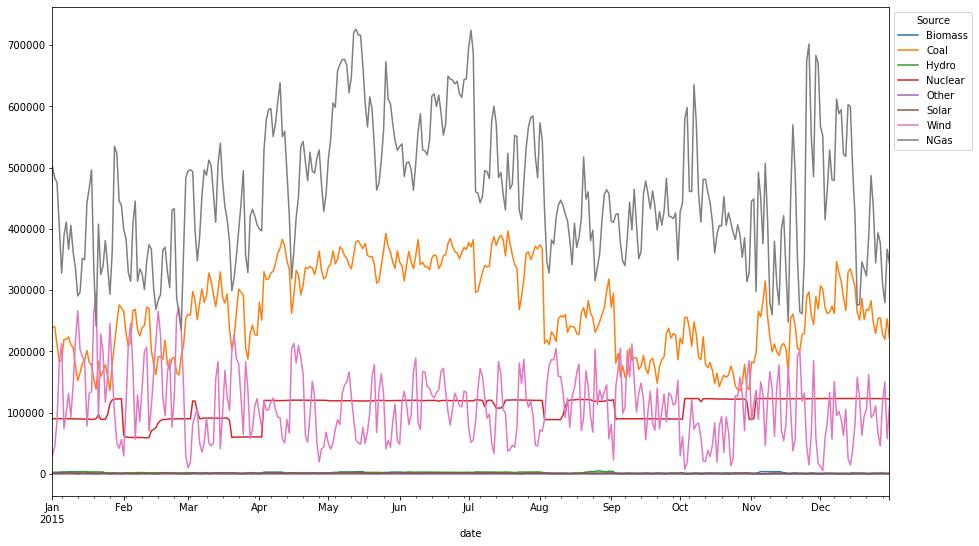

In [21]:
full_df.plot(figsize=(15,9)).legend(title='Source', bbox_to_anchor=(1, 1));


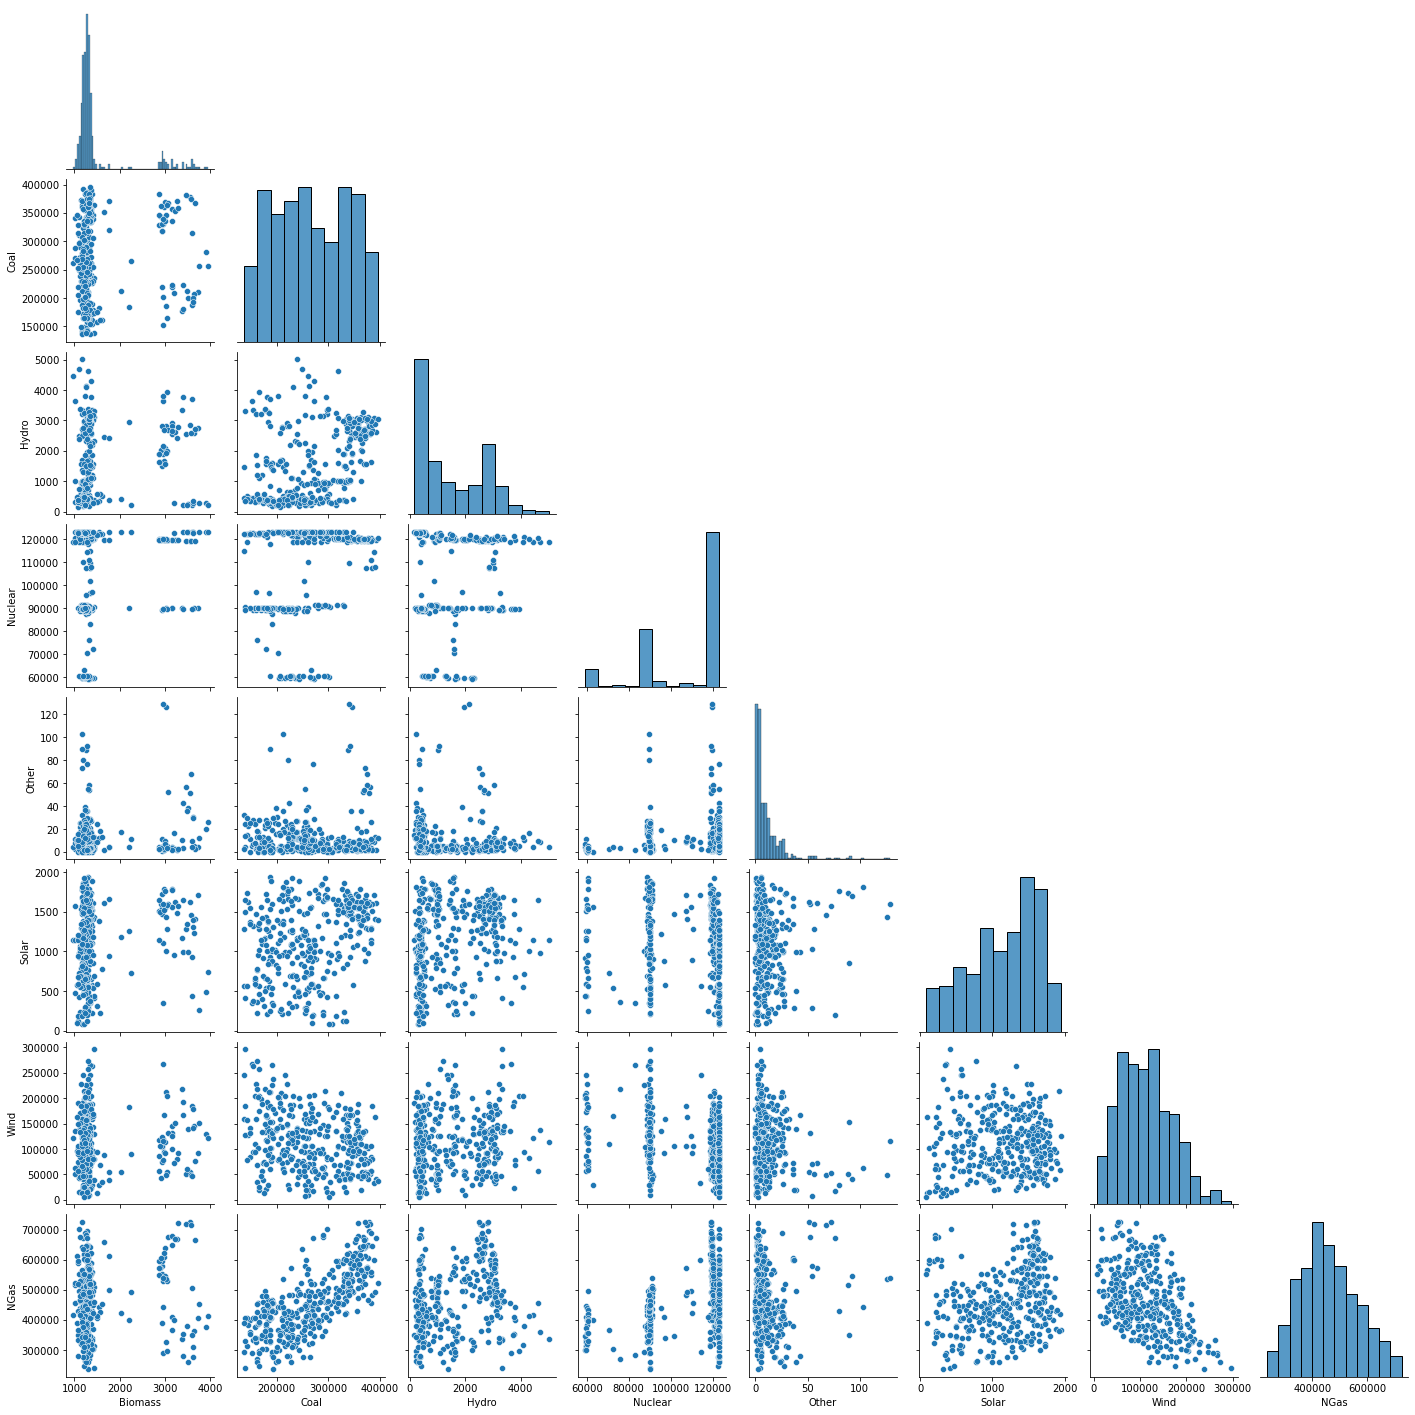

In [22]:
sns.pairplot(full_df, corner=True)

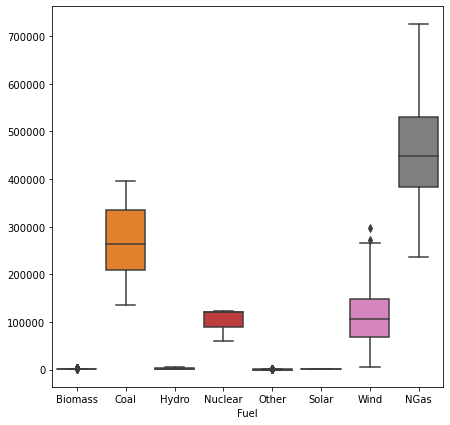

In [26]:
plt.figure(figsize=(7,7))
sns.boxplot(data = full_df,
            
            );


#### Relative to years past, natural gas appears to be having an increse in use for generation at the expense of coal. Wind also is showing slight growth.

### Export the cleaned data

In [25]:
full_df.to_csv('../../data/final_dfs/2015_clean.csv')